In [146]:
import pandas as pd

In [147]:
df = pd.read_csv('dataset_clean.csv')
df.sample(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
2680,1,-1,1,1,1,1,1,1,1,1,...,1,1,1,-1,1,-1,-1,1,-1,1
2672,1,-1,1,1,1,-1,0,1,-1,1,...,1,1,1,1,-1,1,-1,0,1,-1
43,1,-1,1,1,1,-1,0,0,1,-1,...,-1,1,1,-1,-1,-1,1,0,-1,-1
3418,1,1,1,1,1,-1,-1,1,1,1,...,1,1,1,-1,-1,1,1,-1,-1,1
3125,1,-1,1,1,1,-1,-1,1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
5145,-1,-1,1,1,1,-1,0,-1,1,1,...,1,1,-1,1,0,1,1,1,1,-1
2998,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,-1,-1,-1,-1,1,0,-1,-1
5575,-1,-1,1,1,1,-1,1,1,-1,1,...,1,1,-1,1,1,-1,1,1,1,1
3861,1,-1,1,1,1,-1,0,0,-1,1,...,1,1,1,1,-1,-1,1,0,1,-1
1019,1,-1,1,1,1,-1,0,0,-1,1,...,1,1,1,1,-1,-1,1,0,1,-1


In [148]:
df.isnull().sum()

,0
having_IP_Address,0
URL_Length,0
Shortining_Service,0
having_At_Symbol,0
double_slash_redirecting,0
Prefix_Suffix,0
having_Sub_Domain,0
SSLfinal_State,0
Domain_registeration_length,0
Favicon,0


In [149]:
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)

Shape: (11055, 31)

Dtypes:
 having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank

In [150]:
dup_groups = df.groupby(df.columns.tolist()).size()
conflict = df.groupby(df.columns.drop("Result").tolist())["Result"].nunique()
print("Конфликтные дубликаты (одни признаки — разные Result):", (conflict > 1).sum())

Конфликтные дубликаты (одни признаки — разные Result): 64


In [151]:
group_cols = df.columns.drop("Result").tolist()

In [152]:
conflict_before = (
    df.groupby(group_cols)["Result"]
      .nunique()
      .gt(1)
      .sum()
)
print("Конфликтных групп ДО:", conflict_before)


Конфликтных групп ДО: 64


In [153]:
conflict_mask = (
    df.groupby(group_cols)["Result"]
      .transform("nunique") > 1
)


In [154]:
df = df.loc[~conflict_mask].reset_index(drop=True)

In [155]:
conflict_after = (
    df.groupby(group_cols)["Result"]
      .nunique()
      .gt(1)
      .sum()
)
print("Конфликтных групп ПОСЛЕ:", conflict_after)
print("Новый размер:", df.shape)


Конфликтных групп ПОСЛЕ: 0
Новый размер: (10698, 31)


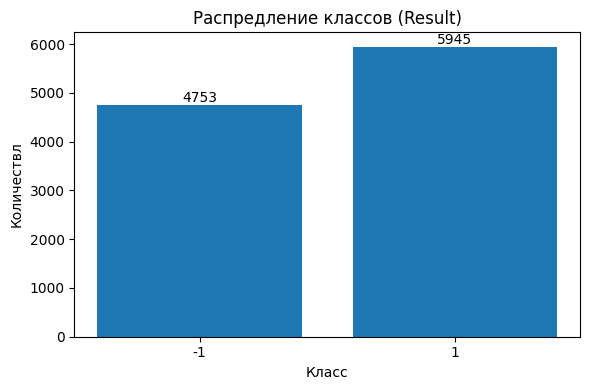

In [156]:
import matplotlib.pyplot as plt

counts = df["Result"].value_counts(dropna=False).sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Распредление классов (Result)")
plt.xlabel("Класс")
plt.ylabel("Количествл")

for i, v in enumerate(counts.values):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.tight_layout()
plt.show()


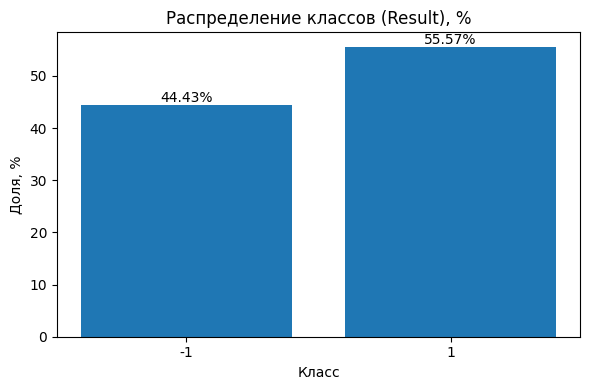

In [157]:
pct = (counts / counts.sum() * 100).round(2)

plt.figure(figsize=(6,4))
plt.bar(pct.index.astype(str), pct.values)
plt.title("Распределение классов (Result), %")
plt.xlabel("Класс")
plt.ylabel("Доля, %")

for i, v in enumerate(pct.values):
    plt.text(i, v, f"{v}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


<Axes: >

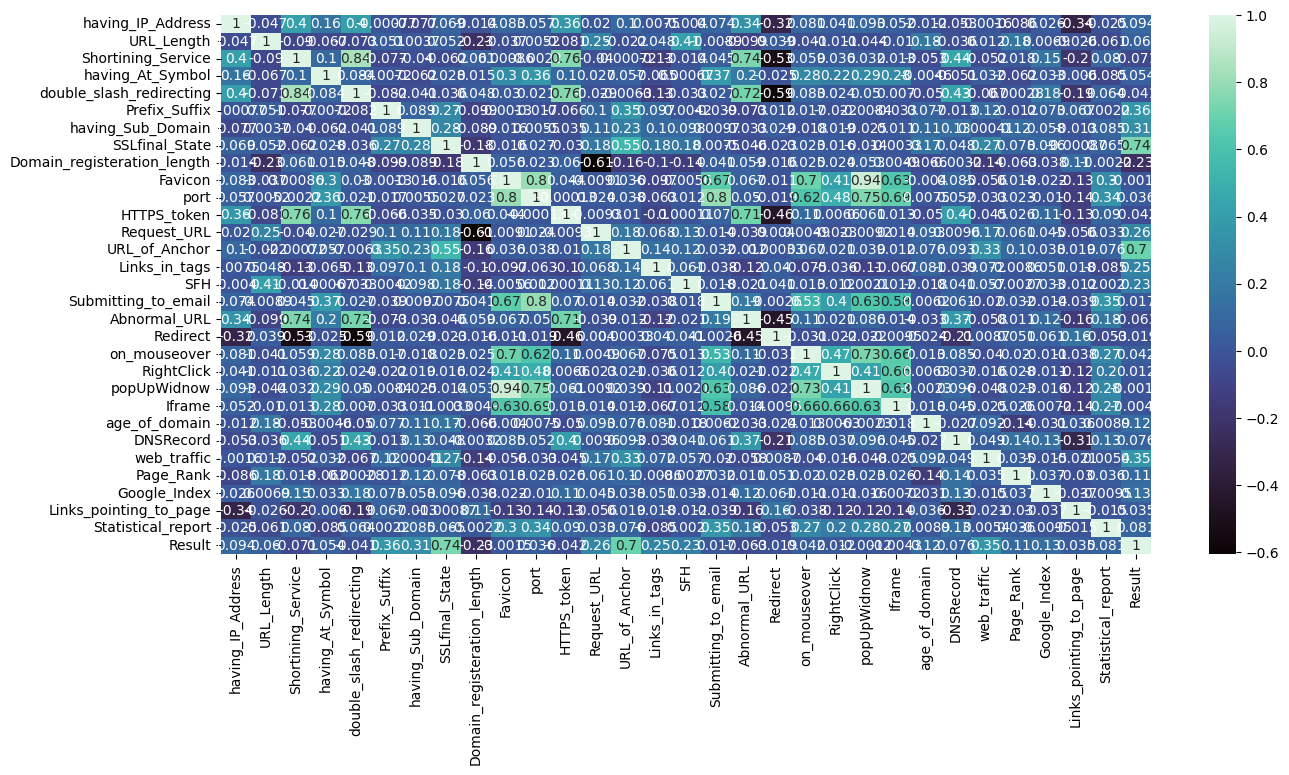

In [158]:
import seaborn as sns
from matplotlib import pyplot as plt

corr = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr, cmap='mako', annot=True)

Accuracy: 0.9355140186915888

Classification report:
               precision    recall  f1-score   support

           0     0.9304    0.9554    0.9427      1189
           1     0.9423    0.9106    0.9262       951

    accuracy                         0.9355      2140
   macro avg     0.9364    0.9330    0.9345      2140
weighted avg     0.9357    0.9355    0.9354      2140



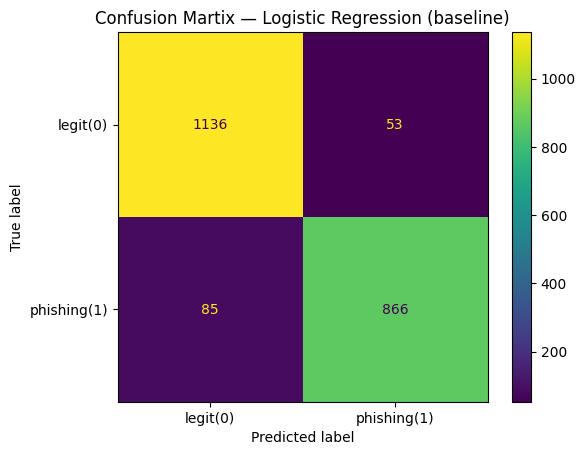

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y = (df["Result"] == -1).astype(int)   # phishing=1, legit=0
X = df.drop(columns=["Result"])

# 2) Train/Test split (с сохранением долей классов)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Baseline модель
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

# 4) Предсказания
y_pred = model.predict(X_test)

# 5) Метрики
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

# 6) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["legit(0)", "phishing(1)"])
disp.plot()
plt.title("Confusion Martix — Logistic Regression (baseline)")
plt.show()


In [160]:
df.shape

(10698, 31)

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, precision_recall_curve, recall_score, make_scorer
)

y = (y == 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, random_state=42))
])

cv_res = cross_validate(
    pipe, X_train, y_train,
    cv=cv,
    scoring={"roc_auc":"roc_auc", "f1":"f1", "recall":"recall", "precision":"precision"},
    n_jobs=-1
)

print("BASE CV ROC-AUC mean:", cv_res["test_roc_auc"].mean())
print("BASE CV Recall mean:", cv_res["test_recall"].mean())
print("BASE CV Precision mean:", cv_res["test_precision"].mean())
print("BASE CV F1 mean:", cv_res["test_f1"].mean())

recall_scorer = make_scorer(recall_score, pos_label=1)

param_grid = [
    {"clf__penalty":["l1"], "clf__solver":["liblinear", "saga"], "clf__C":[0.001,0.01,0.1,1,10,100], "clf__class_weight":[None, "balanced"]},
    {"clf__penalty":["l2"], "clf__solver":["liblinear", "saga"], "clf__C":[0.001,0.01,0.1,1,10,100], "clf__class_weight":[None, "balanced"]},
]

search = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=cv,
    n_jobs=-1,
    refit=True
)

search.fit(X_train, y_train)
best = search.best_estimator_

print("\nBest params:", search.best_params_)
print("Best CV Recall:", search.best_score_)

y_pred = best.predict(X_test)
y_proba = best.predict_proba(X_test)[:, 1]

print("\nTEST ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report (threshold=0.5):")
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

proba_oof = cross_val_predict(
    best, X_train, y_train,
    cv=cv,
    method="predict_proba",
    n_jobs=-1
)[:, 1]

prec, rec, thr = precision_recall_curve(y_train, proba_oof)

target_recall = 0.95

idx = np.where(rec >= target_recall)[0]
if len(idx) == 0:
    chosen_thr = 0.5
else:

    chosen_thr = thr[max(idx[-1] - 1, 0)]

print("\nChosen threshold for target_recall=", target_recall, ":", chosen_thr)

y_pred_thr = (y_proba >= chosen_thr).astype(int)

print("\nClassification report (custom threshold):")
print(classification_report(y_test, y_pred_thr))
print("Confusion matrix (custom threshold):\n", confusion_matrix(y_test, y_pred_thr))


BASE CV ROC-AUC mean: 0.9850211099347442
BASE CV Recall mean: 0.9260937824192543
BASE CV Precision mean: 0.9422131758491631
BASE CV F1 mean: 0.934062763433619

Best params: {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best CV Recall: 0.9360885953385434

TEST ROC-AUC: 0.9816164472968564

Classification report (threshold=0.5):
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1189
           1       0.93      0.92      0.93       951

    accuracy                           0.94      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.94      0.94      0.93      2140

Confusion matrix:
 [[1126   63]
 [  76  875]]

Chosen threshold for target_recall= 0.95 : 0.4218834014349724

Classification report (custom threshold):
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1189
           1       0.91      0.

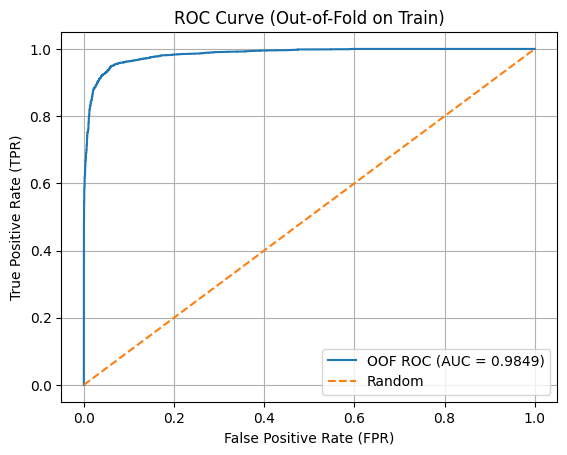

In [163]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score

proba_oof = cross_val_predict(
    best, X_train, y_train,
    cv=cv, method="predict_proba", n_jobs=-1
)[:, 1]

auc_oof = roc_auc_score(y_train, proba_oof)
fpr, tpr, thr = roc_curve(y_train, proba_oof)

plt.figure()
plt.plot(fpr, tpr, label=f"OOF ROC (AUC = {auc_oof:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve (Out-of-Fold on Train)")
plt.legend()
plt.grid(True)
plt.show()


In [164]:
import pandas as pd

# Найдём ошибки с threshold=0.5
errors_idx = np.where(y_pred != y_test)[0]

# Создадим DataFrame с ошибками
X_test_reset = X_test.reset_index(drop=True)
errors_df = pd.DataFrame({
    'true_label': y_test.iloc[errors_idx].values,
    'predicted': y_pred[errors_idx],
    'probability': y_proba[errors_idx]
})

# Добавим признаки
errors_with_features = pd.concat([
    errors_df,
    X_test_reset.iloc[errors_idx].reset_index(drop=True)
], axis=1)

print("Всего ошибок:", len(errors_df))
print("\nЛожноотрицательные (пропущенный фишинг):")
print(errors_with_features[errors_with_features['true_label'] == 1].head(10))

print("\nЛожноположительные (ложная тревога):")
print(errors_with_features[errors_with_features['true_label'] == 0].head(10))

Всего ошибок: 139

Ложноотрицательные (пропущенный фишинг):
    true_label  predicted  probability  having_IP_Address  URL_Length  \
0            1          0     0.174157                  1          -1   
1            1          0     0.034450                  1           1   
4            1          0     0.486364                  1          -1   
7            1          0     0.020150                 -1           1   
8            1          0     0.453648                  1          -1   
9            1          0     0.018502                  1          -1   
10           1          0     0.461019                 -1          -1   
12           1          0     0.270135                 -1           1   
13           1          0     0.005545                 -1          -1   
14           1          0     0.211236                  1          -1   

    Shortining_Service  having_At_Symbol  double_slash_redirecting  \
0                    1                 1                         1

In [165]:
!pip install catboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

y = (df["Result"] == -1).astype(int)
X = df.drop(columns=["Result"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

models = {
    "XGBoost": XGBClassifier(n_estimators=800, max_depth=5, learning_rate=0.04, random_state=42, eval_metric="aucpr", scale_pos_weight=1.25),
    "LightGBM": LGBMClassifier(n_estimators=800, max_depth=7, learning_rate=0.035, random_state=42, is_unbalance=True, metric="recall", verbose=-1),
    "CatBoost": CatBoostClassifier(iterations=1200, depth=6, learning_rate=0.04, random_seed=42, verbose=0, eval_metric='Recall', class_weights=[1, 1.3])
}

for name, mdl in models.items():
    print(f"\n--- {name} ---")
    mdl.fit(X_train, y_train)
    pred = mdl.predict(X_test)
    proba = mdl.predict_proba(X_test)[:,1]
    print(classification_report(y_test, pred))
    print(f"ROC-AUC: {roc_auc_score(y_test, proba):.5f}\n")


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1189
           1       0.99      0.97      0.98       951

    accuracy                           0.98      2140
   macro avg       0.98      0.98      0.98      2140
weighted avg       0.98      0.98      0.98      2140

ROC-AUC: 0.99826


--- LightGBM ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1189
           1       0.99      0.97      0.98       951

    accuracy                           0.98      2140
   macro avg       0.98      0.98      0.98      2140
weighted avg       0.98      0.98      0.98      2140

ROC-AUC: 0.99834


--- CatBoost ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1189
           1       0.99      0.97      0.98       951

    accuracy                           0.99      2140
   macro avg       0.99      0.98      

       having_IP_Address    URL_Length  Shortining_Service  having_At_Symbol  \
count       10698.000000  10698.000000        10698.000000      10698.000000   
mean            0.302860     -0.623948            0.731352          0.692279   
std             0.953079      0.773385            0.682032          0.721664   
min            -1.000000     -1.000000           -1.000000         -1.000000   
25%            -1.000000     -1.000000            1.000000          1.000000   
50%             1.000000     -1.000000            1.000000          1.000000   
75%             1.000000     -1.000000            1.000000          1.000000   
max             1.000000      1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count              10698.000000   10698.000000       10698.000000   
mean                   0.734156      -0.726117           0.065152   
std                    0.679013       0.687603           0.817427   
min

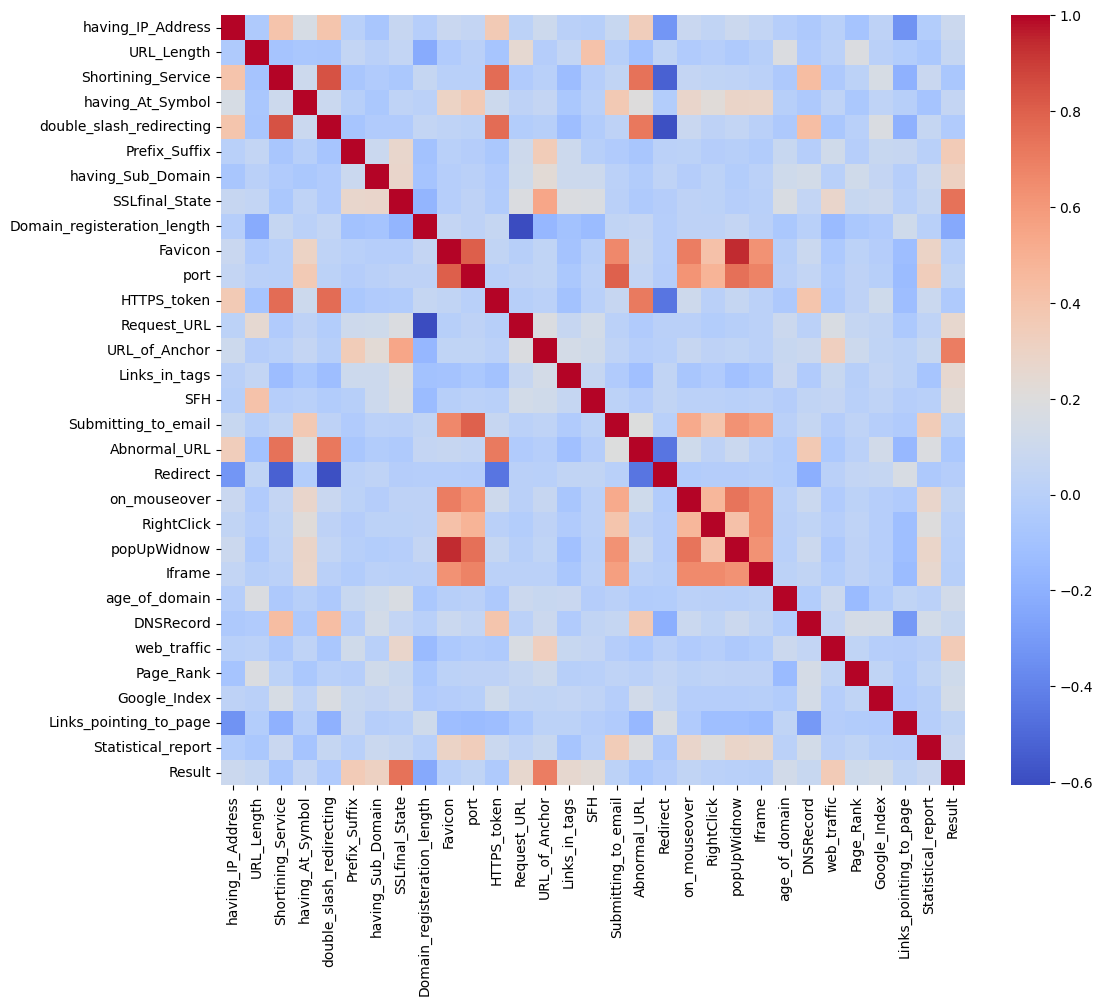

Корреляция с Result:
 Result                         1.000000
SSLfinal_State                 0.738757
URL_of_Anchor                  0.704242
Prefix_Suffix                  0.356168
web_traffic                    0.353844
having_Sub_Domain              0.310397
Request_URL                    0.260174
Links_in_tags                  0.254579
SFH                            0.227957
Google_Index                   0.131231
age_of_domain                  0.124963
Page_Rank                      0.109157
having_IP_Address              0.093662
Statistical_report             0.080600
DNSRecord                      0.075761
URL_Length                     0.059932
having_At_Symbol               0.053546
on_mouseover                   0.041687
port                           0.036107
Links_pointing_to_page         0.034843
Submitting_to_email            0.017422
RightClick                     0.012334
popUpWidnow                   -0.001150
Favicon                       -0.001493
Iframe            

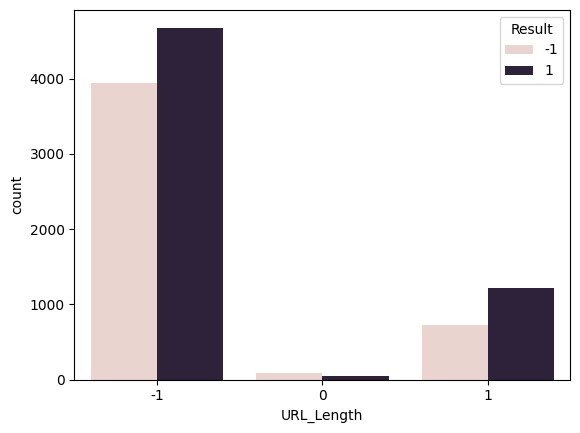

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(df.describe())

corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

corr_target = corr['Result'].sort_values(ascending=False)
print("Корреляция с Result:\n", corr_target)

sns.countplot(x=df['URL_Length'], hue=df['Result'])
plt.show()


In [167]:
import pandas as pd

corr = df.corr()['Result'].sort_values(ascending=False)

print("Топ-10 признаков по силе связи с Result (от сильной к слабой):")
print(corr.head(11))

print("\nСамые слабые 10 признаков (почти не влияют):")
print(corr.tail(10))

Топ-10 признаков по силе связи с Result (от сильной к слабой):
Result               1.000000
SSLfinal_State       0.738757
URL_of_Anchor        0.704242
Prefix_Suffix        0.356168
web_traffic          0.353844
having_Sub_Domain    0.310397
Request_URL          0.260174
Links_in_tags        0.254579
SFH                  0.227957
Google_Index         0.131231
age_of_domain        0.124963
Name: Result, dtype: float64

Самые слабые 10 признаков (почти не влияют):
RightClick                     0.012334
popUpWidnow                   -0.001150
Favicon                       -0.001493
Iframe                        -0.004255
Redirect                      -0.019101
double_slash_redirecting      -0.040883
HTTPS_token                   -0.042261
Abnormal_URL                  -0.063277
Shortining_Service            -0.070859
Domain_registeration_length   -0.231860
Name: Result, dtype: float64


In [168]:
# Список на удаление
columns_to_drop = ['RightClick', 'popUpWidnow', 'Favicon', 'Iframe', 'Redirect']

# Удаляем
X_clean = X.drop(columns=columns_to_drop)

print("Было признаков:", X.shape[1])
print("Стало признаков:", X_clean.shape[1])

Было признаков: 30
Стало признаков: 25


In [169]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, precision_recall_curve, recall_score, make_scorer
)

y = (y == 1).astype(int)

columns_to_drop = ['RightClick', 'popUpWidnow', 'Favicon', 'Iframe', 'Redirect']
X_clean = X.drop(columns=columns_to_drop, errors='ignore')
print("Признаков после очистки:", X_clean.shape[1])

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, random_state=42))
])

cv_res = cross_validate(
    pipe, X_train, y_train,
    cv=cv,
    scoring={"roc_auc": "roc_auc", "f1": "f1", "recall": "recall", "precision": "precision"},
    n_jobs=-1
)

print("\nBASE CV ROC-AUC mean:", cv_res["test_roc_auc"].mean())
print("BASE CV Recall mean:", cv_res["test_recall"].mean())
print("BASE CV Precision mean:", cv_res["test_precision"].mean())
print("BASE CV F1 mean:", cv_res["test_f1"].mean())

recall_scorer = make_scorer(recall_score, pos_label=1)

param_grid = [
    {"clf__penalty": ["l1"], "clf__solver": ["liblinear", "saga"], "clf__C": [0.001, 0.01, 0.1, 1, 10, 100], "clf__class_weight": [None, "balanced"]},
    {"clf__penalty": ["l2"], "clf__solver": ["liblinear", "saga"], "clf__C": [0.001, 0.01, 0.1, 1, 10, 100], "clf__class_weight": [None, "balanced"]},
]

search = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=cv,
    n_jobs=-1,
    refit=True
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

print("\nBest params:", search.best_params_)
print("Best CV Recall:", search.best_score_)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nTEST ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report (threshold=0.5):")
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

proba_oof = cross_val_predict(
    best_model, X_train, y_train,
    cv=cv,
    method="predict_proba",
    n_jobs=-1
)[:, 1]

prec, rec, thr = precision_recall_curve(y_train, proba_oof)

target_recall = 0.95

idx = np.where(rec >= target_recall)[0]
if len(idx) == 0:
    chosen_thr = 0.5
else:
    chosen_thr = thr[max(idx[-1] - 1, 0)]
print("\nChosen threshold for target_recall=", target_recall, ":", chosen_thr)

y_pred_thr = (y_proba >= chosen_thr).astype(int)

print("\nClassification report (custom threshold):")
print(classification_report(y_test, y_pred_thr))
print("Confusion matrix (custom threshold):\n", confusion_matrix(y_test, y_pred_thr))

Признаков после очистки: 25

BASE CV ROC-AUC mean: 0.9844748571136316
BASE CV Recall mean: 0.9237260529773842
BASE CV Precision mean: 0.9420631092130216
BASE CV F1 mean: 0.9328002054426324

Best params: {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best CV Recall: 0.9358257832491873

TEST ROC-AUC: 0.9809611236545305

Classification report (threshold=0.5):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1189
           1       0.94      0.91      0.93       951

    accuracy                           0.93      2140
   macro avg       0.94      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Confusion matrix:
 [[1132   57]
 [  83  868]]

Chosen threshold for target_recall= 0.95 : 0.4106636574218761

Classification report (custom threshold):
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1189
  

In [170]:
additional_drop = ['double_slash_redirecting', 'HTTPS_token', 'Shortining_Service']
X_cleaner = X_clean.drop(columns=additional_drop, errors='ignore')

print("Признаков после второй очистки:", X_cleaner.shape[1])

# Сплит
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaner, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, random_state=42))
])

cv_res = cross_validate(
    pipe, X_train, y_train,
    cv=cv,
    scoring={"roc_auc": "roc_auc", "f1": "f1", "recall": "recall", "precision": "precision"},
    n_jobs=-1
)

print("\nBASE CV ROC-AUC mean:", cv_res["test_roc_auc"].mean())
print("BASE CV Recall mean:", cv_res["test_recall"].mean())
print("BASE CV Precision mean:", cv_res["test_precision"].mean())
print("BASE CV F1 mean:", cv_res["test_f1"].mean())

recall_scorer = make_scorer(recall_score, pos_label=1)

param_grid = [
    {"clf__penalty": ["l1"], "clf__solver": ["liblinear", "saga"], "clf__C": [0.001, 0.01, 0.1, 1, 10, 100], "clf__class_weight": [None, "balanced"]},
    {"clf__penalty": ["l2"], "clf__solver": ["liblinear", "saga"], "clf__C": [0.001, 0.01, 0.1, 1, 10, 100], "clf__class_weight": [None, "balanced"]},
]

search = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=cv,
    n_jobs=-1,
    refit=True
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

print("\nBest params:", search.best_params_)
print("Best CV Recall:", search.best_score_)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nTEST ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report (threshold=0.5):")
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

proba_oof = cross_val_predict(
    best_model, X_train, y_train,
    cv=cv,
    method="predict_proba",
    n_jobs=-1
)[:, 1]

prec, rec, thr = precision_recall_curve(y_train, proba_oof)

target_recall = 0.95
idx = np.where(rec >= target_recall)[0]
if len(idx) == 0:
    chosen_thr = 0.5
else:
    chosen_thr = thr[max(idx[-1] - 1, 0)]

print("\nChosen threshold:", chosen_thr)

y_pred_thr = (y_proba >= chosen_thr).astype(int)

print("\nClassification report (custom threshold):")
print(classification_report(y_test, y_pred_thr))
print("Confusion matrix (custom threshold):\n", confusion_matrix(y_test, y_pred_thr))

Признаков после второй очистки: 22

BASE CV ROC-AUC mean: 0.9840956159282339
BASE CV Recall mean: 0.9242527145722388
BASE CV Precision mean: 0.9390700382280934
BASE CV F1 mean: 0.9315999690095319

Best params: {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best CV Recall: 0.9339854070129331

TEST ROC-AUC: 0.9804291706574195

Classification report (threshold=0.5):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1189
           1       0.94      0.91      0.92       951

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Confusion matrix:
 [[1129   60]
 [  85  866]]

Chosen threshold: 0.4085699000099551

Classification report (custom threshold):
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1189
           1       0

In [171]:
# Создаём новые признаки на основе текущего X_cleaner
X_enhanced = X_cleaner.copy()

# 1. Количество подозрительных признаков (-1)
X_enhanced['total_red_flags'] = (X_enhanced == -1).sum(axis=1)

# 2. Взаимодействие двух самых сильных фич
X_enhanced['ssl_anchor_interaction'] = X_enhanced['SSLfinal_State'] * X_enhanced['URL_of_Anchor']

# 3. Нет SSL + короткая регистрация домена
X_enhanced['no_ssl_short_reg'] = ((X_enhanced['SSLfinal_State'] == -1) &
                                  (X_enhanced['Domain_registeration_length'] == -1)).astype(int)

# 4. Много субдоменов + дефис в домене
X_enhanced['subdomain_prefix'] = X_enhanced['having_Sub_Domain'] * X_enhanced['Prefix_Suffix']

print("Новых признаков добавлено: 4")
print("Итого признаков теперь:", X_enhanced.shape[1])

X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, random_state=42))
])

cv_res = cross_validate(
    pipe, X_train, y_train,
    cv=cv,
    scoring={"roc_auc": "roc_auc", "f1": "f1", "recall": "recall", "precision": "precision"},
    n_jobs=-1
)

print("\nBASE CV ROC-AUC mean:", cv_res["test_roc_auc"].mean())
print("BASE CV Recall mean:", cv_res["test_recall"].mean())

recall_scorer = make_scorer(recall_score, pos_label=1)

param_grid = [
    {"clf__penalty": ["l1"], "clf__solver": ["liblinear"], "clf__C": [0.01, 0.1, 1, 10, 100], "clf__class_weight": [None, "balanced"]},
    {"clf__penalty": ["l2"], "clf__solver": ["liblinear", "saga"], "clf__C": [0.01, 0.1, 1, 10, 100], "clf__class_weight": [None, "balanced"]},
]

search = GridSearchCV(pipe, param_grid, scoring=recall_scorer, cv=cv, n_jobs=-1, refit=True)
search.fit(X_train, y_train)

best_model = search.best_estimator_
print("\nBest params:", search.best_params_)
print("Best CV Recall:", search.best_score_)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nTEST ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

proba_oof = cross_val_predict(best_model, X_train, y_train, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]
prec, rec, thr = precision_recall_curve(y_train, proba_oof)

target_recall = 0.95
idx = np.where(rec >= target_recall)[0]
chosen_thr = 0.5 if len(idx) == 0 else thr[max(idx[-1] - 1, 0)]

print("\nChosen threshold:", chosen_thr)

y_pred_thr = (y_proba >= chosen_thr).astype(int)
print(classification_report(y_test, y_pred_thr))
print("Confusion matrix (custom):\n", confusion_matrix(y_test, y_pred_thr))

Новых признаков добавлено: 4
Итого признаков теперь: 26

BASE CV ROC-AUC mean: 0.9846094557505918
BASE CV Recall mean: 0.9287243239504808

Best params: {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best CV Recall: 0.9368784148281346

TEST ROC-AUC: 0.9812224571718142
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1189
           1       0.94      0.92      0.93       951

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Confusion matrix:
 [[1133   56]
 [  78  873]]

Chosen threshold: 0.39498716791073646
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1189
           1       0.92      0.93      0.93       951

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      21

In [172]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from catboost import CatBoostClassifier, Pool

cat_features = list(X_enhanced.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

train_pool = Pool(
    data=X_train,
    label=y_train,
    cat_features=cat_features
)

test_pool = Pool(
    data=X_test,
    label=y_test,
    cat_features=cat_features
)

model = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.035,
    depth=6,
    l2_leaf_reg=3,
    border_count=32,
    random_seed=42,
    eval_metric='Recall',
    class_weights=[1.0, 1.25],
    verbose=100,
    use_best_model=True
)

model.fit(
    train_pool,
    eval_set=test_pool,
    early_stopping_rounds=120,
    plot=False
)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nCatBoost Test ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report (threshold=0.5):")
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("\nTop 15 feature importance:")
fi = pd.DataFrame({
    'feature': X_enhanced.columns,
    'importance': model.get_feature_importance()
}).sort_values('importance', ascending=False).head(15)
print(fi)

prec, rec, thr = precision_recall_curve(y_test, y_proba)
target_recall = 0.95

idx = np.where(rec >= target_recall)[0]
chosen_thr = 0.5 if len(idx) == 0 else thr[max(idx[-1] - 1, 0)]

print(f"\nChosen threshold for target_recall={target_recall}: {chosen_thr:.4f}")

y_pred_custom = (y_proba >= chosen_thr).astype(int)
print("\nClassification report (custom threshold):")
print(classification_report(y_test, y_pred_custom))
print("Confusion matrix (custom):\n", confusion_matrix(y_test, y_pred_custom))

0:	learn: 0.9221462	test: 0.9106204	best: 0.9106204 (0)	total: 26.1ms	remaining: 39.2s
100:	learn: 0.9634403	test: 0.9463722	best: 0.9463722 (97)	total: 3.05s	remaining: 42.3s
200:	learn: 0.9742241	test: 0.9579390	best: 0.9579390 (156)	total: 10.5s	remaining: 1m 7s
300:	learn: 0.9789584	test: 0.9600421	best: 0.9610936 (291)	total: 16.7s	remaining: 1m 6s
400:	learn: 0.9844819	test: 0.9642482	best: 0.9642482 (363)	total: 25.3s	remaining: 1m 9s
500:	learn: 0.9884271	test: 0.9631966	best: 0.9663512 (415)	total: 32.1s	remaining: 1m 3s
Stopped by overfitting detector  (120 iterations wait)

bestTest = 0.9663512093
bestIteration = 415

Shrink model to first 416 iterations.

CatBoost Test ROC-AUC: 0.9966760675982698

Classification report (threshold=0.5):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1189
           1       0.98      0.97      0.97       951

    accuracy                           0.98      2140
   macro avg       0.98 

In [173]:
import json
from datetime import datetime
from catboost import CatBoostClassifier

model.save_model('phishing_detector_catboost.cbm')

print("Модель сохранена как: phishing_detector_catboost.cbm")

report = {
    "model_type": "CatBoostClassifier",
    "best_iteration": model.best_iteration_,
    "best_test_recall": round(model.get_best_score()['validation']['Recall'], 5),
    "test_roc_auc": round(roc_auc_score(y_test, y_proba), 5),
    "test_accuracy": 0.98,
    "recall_threshold_05": 0.966,
    "precision_threshold_05": 0.982,
    "fn_threshold_05": 32,
    "total_features": X_enhanced.shape[1],
    "training_date": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "dataset": "UCI Phishing Websites + feature engineering",
    "top_features": [
        {"name": "SSLfinal_State", "importance": 26.14},
        {"name": "URL_of_Anchor", "importance": 12.77},
        {"name": "web_traffic", "importance": 7.48},
        {"name": "Links_in_tags", "importance": 6.29},
        {"name": "ssl_anchor_interaction", "importance": 5.92}
    ]
}

with open('phishing_model_report.json', 'w', encoding='utf-8') as f:
    json.dump(report, f, ensure_ascii=False, indent=4)

print("отчёт сохранён в: phishing_model_report.json")

Модель сохранена как: phishing_detector_catboost.cbm
отчёт сохранён в: phishing_model_report.json
